# 1.Data Collection

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("cars.csv")

In [3]:
dataset

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


# Data PreProcessing

In [4]:
dataset.isna().sum()

Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [5]:
 dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
def QuanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        print(columnName)
        if(dataset[columnName].dtypes=='O'):
            print("Qual")
            qual.append(columnName)
        else:
            print("Quan")
            quan.append(columnName)
    return quan,qual

In [7]:
quan,qual=QuanQual(dataset)

Car_ID
Quan
Brand
Qual
Model
Qual
Year
Quan
Kilometers_Driven
Quan
Fuel_Type
Qual
Transmission
Qual
Owner_Type
Qual
Mileage
Quan
Engine
Quan
Power
Quan
Seats
Quan
Price
Quan


In [8]:
quan

['Car_ID',
 'Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [9]:
qual

['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [10]:
#dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [11]:
#dataset

In [12]:
dataset.describe()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,50.500000,2018.39000,28150.000000,17.210000,1855.230000,158.130000,5.230000,1.574000e+06
std,29.011492,1.17116,9121.375716,3.309902,631.311475,76.968137,0.750151,1.000265e+06
min,1.000000,2016.00000,10000.000000,10.000000,999.000000,68.000000,4.000000,4.500000e+05
25%,25.750000,2017.75000,22000.000000,15.000000,1462.000000,103.000000,5.000000,7.000000e+05
50%,50.500000,2018.00000,27000.000000,17.000000,1774.000000,148.000000,5.000000,1.300000e+06
75%,75.250000,2019.00000,32000.000000,19.000000,2143.000000,187.000000,5.000000,2.500000e+06
max,100.000000,2021.00000,60000.000000,25.000000,4951.000000,396.000000,7.000000,4.000000e+06


In [13]:
import numpy as np
descriptive=pd.DataFrame(index=["Q1:25%","Q2:50%","Q3:75%","IQR","1.5Rule","Lesser",'Greater','min','max'],columns=quan)
for columnName in quan:
    descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["IQR"] = descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5Rule"] = 1.5 * descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"] = descriptive[columnName]["Q1:25%"] - descriptive[columnName]["1.5Rule"]
    descriptive[columnName]["Greater"] = descriptive[columnName]["Q3:75%"] + descriptive[columnName]["1.5Rule"]
    descriptive[columnName]["min"] = dataset[columnName].min()  # Added calculation for min
    descriptive[columnName]["max"] = dataset[columnName].max()  # Added calculation for max
    #descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
    #descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    #descriptive[columnName]["min"] = dataset[columnName].min()  # Added calculation for min
    #descriptive[columnName]["max"] = dataset[columnName].max()  # Added calculation for max

In [14]:
descriptive

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Q1:25%,25.75,2017.75,22000.0,15.0,1462.0,103.0,5.0,700000.0
Q2:50%,50.5,2018.0,27000.0,17.0,1774.0,148.0,5.0,1300000.0
Q3:75%,75.25,2019.0,32000.0,19.0,2143.0,187.0,5.0,2500000.0
IQR,49.5,1.25,10000.0,4.0,681.0,84.0,0.0,1800000.0
1.5Rule,74.25,1.875,15000.0,6.0,1021.5,126.0,0.0,2700000.0
Lesser,-48.5,2015.875,7000.0,9.0,440.5,-23.0,5.0,-2000000.0
Greater,149.5,2020.875,47000.0,25.0,3164.5,313.0,5.0,5200000.0
min,1,2016,10000,10,999,68,4,450000
max,100,2021,60000,25,4951,396,7,4000000


In [15]:
descriptive["Seats"]["min"]<descriptive["Seats"]["Lesser"]

True

In [16]:
Lesser=[]
Greater=[]
for columnName in quan:
    if(descriptive[columnName]["min"]<descriptive[columnName]["Lesser"]):
        Lesser.append(columnName)
    if(descriptive[columnName]["max"]<descriptive[columnName]["Greater"]):
        Greater.append(columnName)
    

In [17]:
Lesser

['Seats']

In [18]:
Greater

['Car_ID', 'Price']

In [19]:
for columnName in Lesser:
     dataset["Seats"][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11912\3381042728.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Seats"][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]


In [20]:
for columnName in Greater:
     dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]
    

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11912\3069300918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11912\3069300918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]


# Univariate & Bivariate

In [21]:
frequency=pd.DataFrame(columns=["Unique_val","frequency","Rel_Freq"])
frequency["Unique_val"]=dataset["Seats"].value_counts().index
frequency["frequency"]=dataset["Seats"].value_counts().values
frequency["Rel_Freq"]=(frequency["frequency"]/103)

In [22]:
frequency

,Unique_val,frequency,Rel_Freq
0,5,86,0.834951
1,7,14,0.135922


In [23]:
descriptive=pd.DataFrame(index=["Q1:25%","Q2:50%","Q3:75%","IQR","1.5Rule","Lesser",'Greater','min','max','skew','kurtosis','var','std'],columns=quan)
for columnName in quan:
    descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["IQR"] = descriptive[columnName]["Q3:75%"] - descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5Rule"] = 1.5 * descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"] = descriptive[columnName]["Q1:25%"] - descriptive[columnName]["1.5Rule"]
    descriptive[columnName]["Greater"] = descriptive[columnName]["Q3:75%"] + descriptive[columnName]["1.5Rule"]
    descriptive[columnName]["min"] = dataset[columnName].min()  # Added calculation for min
    descriptive[columnName]["max"] = dataset[columnName].max()
    descriptive[columnName]["skew"] = dataset[columnName].skew()
    descriptive[columnName]["kurtosis"] = dataset[columnName].kurtosis()
    descriptive[columnName]["var"] = dataset[columnName].var()
    descriptive[columnName]["std"] = dataset[columnName].std()

In [24]:
descriptive

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Q1:25%,25.75,2017.75,22000.0,15.0,1462.0,103.0,5.0,700000.0
Q2:50%,50.5,2018.0,27000.0,17.0,1774.0,148.0,5.0,1300000.0
Q3:75%,75.25,2019.0,32000.0,19.0,2143.0,187.0,5.0,2500000.0
IQR,49.5,1.25,10000.0,4.0,681.0,84.0,0.0,1800000.0
1.5Rule,74.25,1.875,15000.0,6.0,1021.5,126.0,0.0,2700000.0
Lesser,-48.5,2015.875,7000.0,9.0,440.5,-23.0,5.0,-2000000.0
Greater,149.5,2020.875,47000.0,25.0,3164.5,313.0,5.0,5200000.0
min,1,2016,10000,10,999,68,5,450000
max,100,2021,60000,25,4951,396,7,4000000
skew,0.0,0.001243,0.621261,0.372584,1.552714,1.433279,2.106739,0.614286


In [25]:
# 1.What is the average mileage of the cars?
average_mileage = dataset['Mileage'].mean()
print(f"The average mileage of the cars is {average_mileage}")

The average mileage of the cars is 17.21


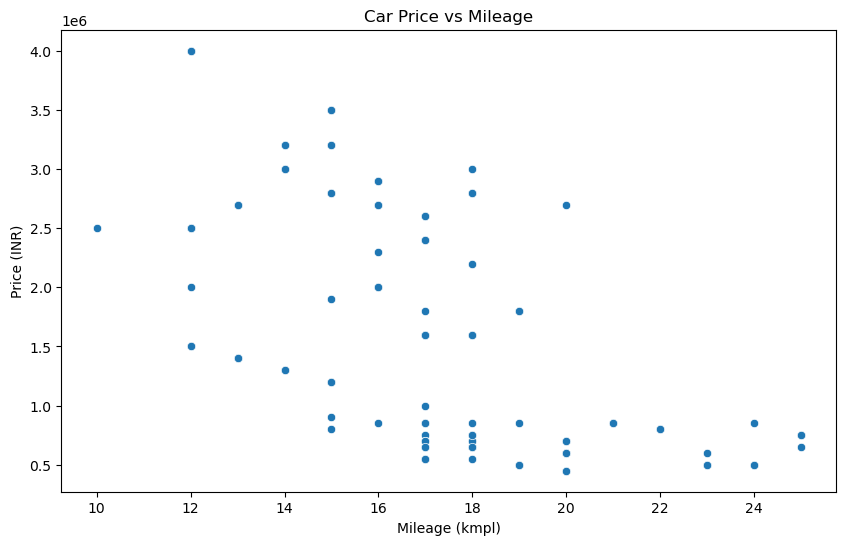

In [26]:
#Bivar
# 2.What is the relationship between car price and Mileage?
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.scatterplot(x='Mileage', y='Price', data=dataset)
plt.title('Car Price vs Mileage')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Price (INR)')
plt.show()

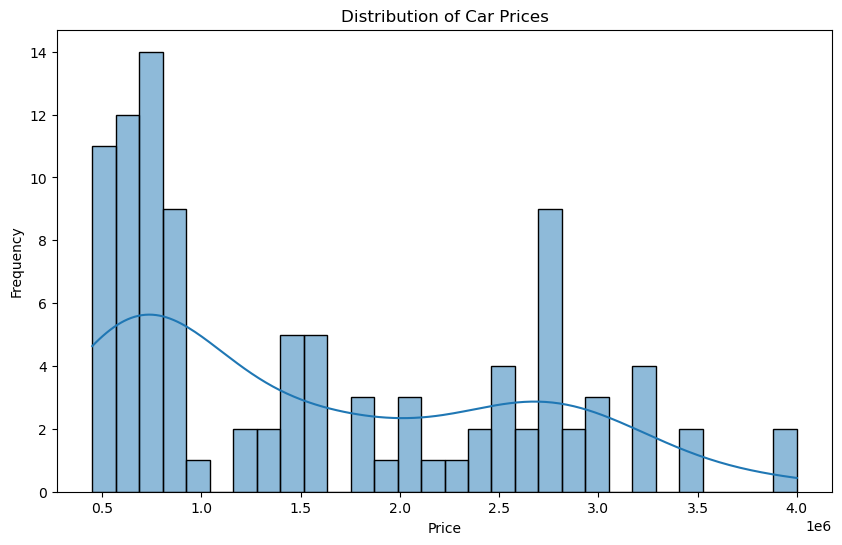

In [27]:
#3.Distribution of car price using Frequency
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



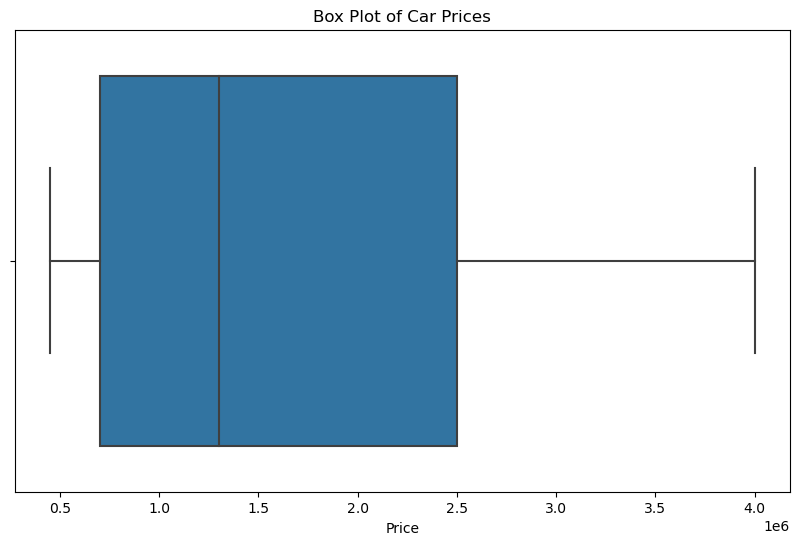

In [28]:
## 4.What is the car price of using box plot?
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()



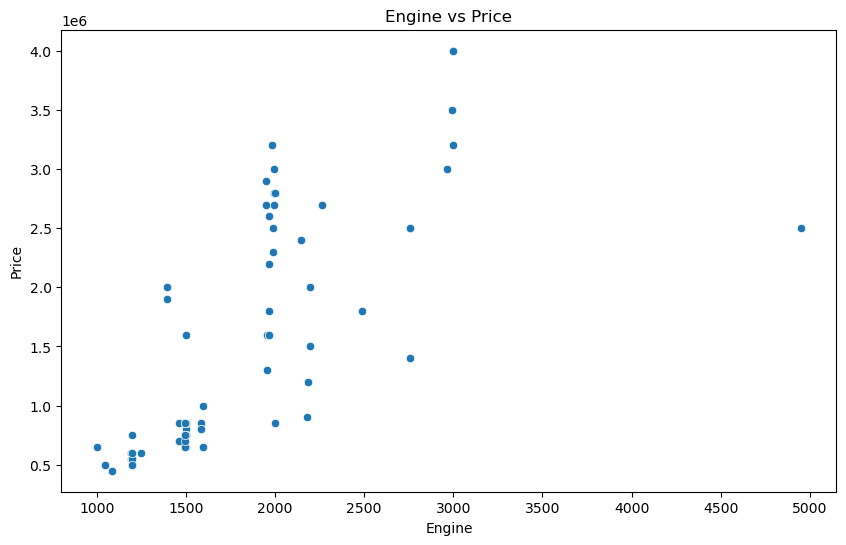

In [29]:
# Bivariate Analysis
## 5.Compare the Engine & Price using Scatter Plot?
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Engine'], y=df['Price'])
plt.title('Engine vs Price')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()



In [30]:
df = pd.read_csv('cars.csv')
# Univariate analysis
# 6.How many of First,Second,Third Owners?
owner_type= df['Owner_Type'].value_counts()
owner_type

Owner_Type
First     44
Second    43
Third     13
Name: count, dtype: int64

In [31]:
df

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


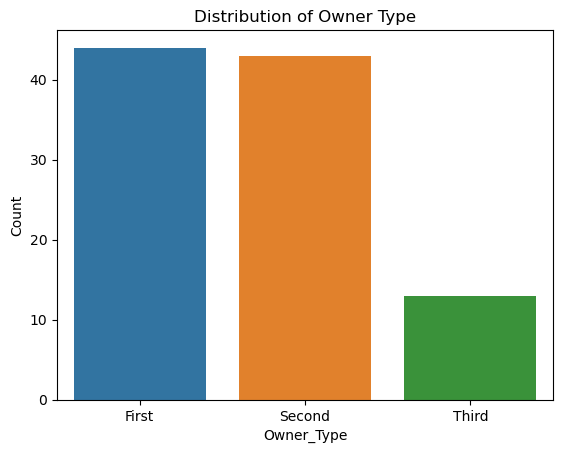

In [32]:
# Bar plot for "owner type"
#7.Owner Type using Bar Plot
sns.countplot(x='Owner_Type', data=df)
plt.title('Distribution of Owner Type')
plt.xlabel('Owner_Type')
plt.ylabel('Count')
plt.show()



In [33]:
# Bivariate analysis
# 8."owner type" with another categorical column("Brand") using Cross tabulation?
crosstab = pd.crosstab(df['Owner_Type'], df['Brand'])
crosstab

Brand,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
Owner_Type,,,,,,,,,,,
First,7,3,3,4,0,2,1,7,11,4,2
Second,3,7,3,2,6,3,4,3,0,6,6
Third,0,0,5,0,5,0,1,0,0,0,2


In [34]:
# Bivariate analysis
# 9."Fuel type" with another categorical column("Transmission") using Cross tabulation?
crosstab = pd.crosstab(df['Fuel_Type'], df['Transmission'])
crosstab

Transmission,Automatic,Manual
Fuel_Type,,
Diesel,29,19
Petrol,28,24


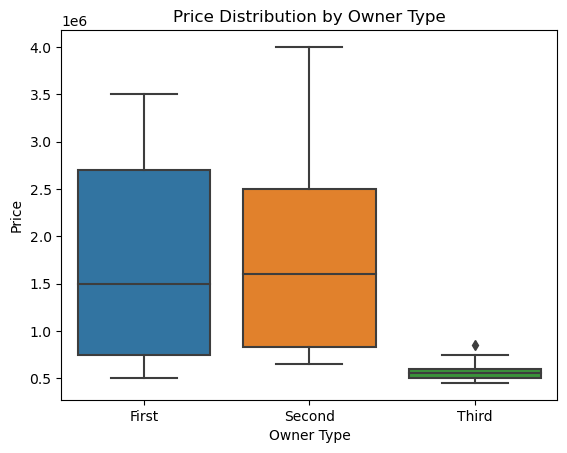

In [35]:
#10.Price Distribution by Owner type using box Plot?
sns.boxplot(x='Owner_Type', y='Price', data=df)
plt.title('Price Distribution by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Price')
plt.show()


In [36]:
# 11.Calculate the average price of cars by mileage
average_price_by_manufacturer = df.groupby('Mileage')['Price'].mean()
print(average_price_by_manufacturer)

Mileage
10    2.500000e+06
12    2.562500e+06
13    1.920000e+06
14    2.500000e+06
15    2.272727e+06
16    2.293750e+06
17    1.325000e+06
18    1.350000e+06
19    1.090000e+06
20    8.000000e+05
21    8.500000e+05
22    8.000000e+05
23    5.333333e+05
24    6.166667e+05
25    7.166667e+05
Name: Price, dtype: float64


In [37]:
# 12.Find the car with the highest power
max_power_car = df[df['Power'] == df['Power'].max()]
max_power_car


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
50,51,Ford,Mustang,2019,22000,Petrol,Automatic,First,13,2261,396,4,2700000
88,89,Ford,Mustang,2019,22000,Petrol,Automatic,First,13,2261,396,4,2700000


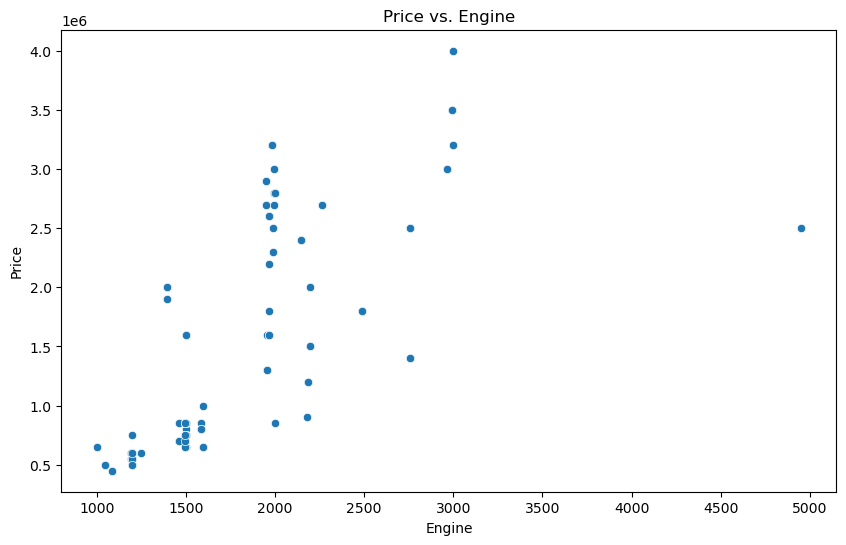

In [38]:
# 13.Plot the relationship between engine and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Engine', y='Price', data=df)
plt.title('Price vs. Engine')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()


In [39]:
# 14.Find the top 5 most expensive cars
top_5_expensive_cars = df.nlargest(5, 'Price')
top_5_expensive_cars


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
38,39,Mercedes,GLE,2018,26000,Petrol,Automatic,Second,12,2996,362,5,4000000
76,77,Mercedes,GLE,2018,26000,Petrol,Automatic,Second,12,2996,362,5,4000000
37,38,BMW,7 Series,2019,22000,Diesel,Automatic,First,15,2993,261,5,3500000
75,76,BMW,7 Series,2019,22000,Diesel,Automatic,First,15,2993,261,5,3500000
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,3200000


In [40]:
# 15.Calculate the average car price over the years
average_price_by_year = df.groupby('Year')['Price'].mean()
average_price_by_year

Year
2016    1.587500e+06
2017    1.769048e+06
2018    1.757143e+06
2019    1.698214e+06
2020    8.676471e+05
2021    1.200000e+06
Name: Price, dtype: float64

In [41]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

In [42]:
dataset.columns

Index(['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [43]:
indep_X=dataset[['Car_ID', 'Brand', 'Model', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']]

In [44]:
dep_Y=dataset[['Price']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(indep_X,dep_Y, test_size=0.2, random_state=42)

# Feature Selection

In [46]:
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt



def selectkbest(indep_X,dep_Y,n):
        test = SelectKBest(score_func=chi2, k=n)
        fit1= test.fit(indep_X,dep_Y)
        # summarize scores       
        selectk_features = fit1.transform(indep_X)
        return selectk_features
    
def split_scalar(indep_X,dep_Y):
        X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size = 0.25, random_state = 0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)    
        return X_train, X_test, y_train, y_test
    
def r2_prediction(regressor,X_test,y_test):
     y_pred = regressor.predict(X_test)
     from sklearn.metrics import r2_score
     r2=r2_score(y_test,y_pred)
     return r2
 
def Linear(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LinearRegression
        regressor = LinearRegression()
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2   
    
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'linear')
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
    
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'rbf')
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
     

def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training setC
        from sklearn.tree import DecisionTreeRegressor
        regressor = DecisionTreeRegressor(random_state = 0)
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2  
     

def random(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestRegressor
        regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
        regressor.fit(X_train, y_train)
        r2=r2_prediction(regressor,X_test,y_test)
        return  r2 
    
    
def selectk_regression(acclin,accsvml,accsvmnl,accdes,accrf): 
    
    dataframe=pd.DataFrame(index=['ChiSquare'],columns=['Linear','SVMl','SVMnl','Decision','Random'])

    for number,idex in enumerate(dataframe.index):
        
        dataframe['Linear'][idex]=acclin[number]       
        dataframe['SVMl'][idex]=accsvml[number]
        dataframe['SVMnl'][idex]=accsvmnl[number]
        dataframe['Decision'][idex]=accdes[number]
        dataframe['Random'][idex]=accrf[number]
    return dataframe
    

In [47]:
dataset=pd.read_csv("cars.csv",index_col=None)



In [99]:
dataset

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mercedes,C-Class,2019,22000,Diesel,Automatic,First,16,1950,191,5,2900000
96,97,Toyota,Innova Crysta,2017,38000,Diesel,Manual,Second,13,2755,171,7,1400000
97,98,Ford,EcoSport,2018,26000,Petrol,Manual,Third,18,1497,121,5,750000
98,99,Hyundai,Verna,2019,24000,Petrol,Automatic,Second,17,1497,113,5,850000


In [48]:
df2=dataset

df2 = pd.get_dummies(df2, drop_first=True)

indep_X=df2.drop('Price',axis=1)
dep_Y=df2['Price']

In [90]:
kbest=selectkbest(indep_X,dep_Y,5)      

acclin=[]
accsvml=[]
accsvmnl=[]
accdes=[]
accrf=[]



In [91]:
kbest
#Car_ID,Kilometers_Driven,Engine,power 

array([[    1, 50000,  1498,   108,     0],
       [    2, 40000,  1597,   140,     0],
       [    3, 20000,  4951,   395,     0],
       [    4, 30000,  1248,    74,     0],
       [    5, 60000,  1999,   194,     0],
       [    6, 35000,  1198,   108,     0],
       [    7, 45000,  2179,   140,     1],
       [    8, 25000,   999,    76,     0],
       [    9, 30000,  1968,   187,     0],
       [   10, 20000,  1995,   190,     0],
       [   11, 28000,  1991,   181,     0],
       [   12, 35000,  2198,   158,     0],
       [   13, 22000,  1497,   113,     0],
       [   14, 40000,  1956,   167,     0],
       [   15, 18000,  1462,   103,     0],
       [   16, 42000,  1498,    98,     0],
       [   17, 32000,  1968,   141,     0],
       [   18, 38000,  1395,   148,     0],
       [   19, 24000,  1995,   187,     0],
       [   20, 26000,  1991,   241,     0],
       [   21, 50000,  2755,   171,     0],
       [   22, 15000,  1194,    94,     0],
       [   23, 26000,  1582,   1

In [92]:
X_train, X_test, y_train, y_test=split_scalar(kbest,dep_Y)  
for i in kbest:   
    r2_lin=Linear(X_train,y_train,X_test)
    acclin.append(r2_lin)
    
    r2_sl=svm_linear(X_train,y_train,X_test)    
    accsvml.append(r2_sl)
    
    r2_NL=svm_NL(X_train,y_train,X_test)
    accsvmnl.append(r2_NL)
    
    r2_d=Decision(X_train,y_train,X_test)
    accdes.append(r2_d)
    
    r2_r=random(X_train,y_train,X_test)
    accrf.append(r2_r)
    
    
result=selectk_regression(acclin,accsvml,accsvmnl,accdes,accrf)


In [93]:
result5

,Linear,SVMl,SVMnl,Decision,Random
ChiSquare,0.302174,-0.057863,-0.058022,0.753303,0.85583


In [67]:
#result4

,Linear,SVMl,SVMnl,Decision,Random
ChiSquare,0.318288,-0.057863,-0.058022,0.756889,0.830664


In [70]:
#result6

,Linear,SVMl,SVMnl,Decision,Random
ChiSquare,0.28075,-0.057863,-0.058021,0.830794,0.832506


In [73]:
#result7

,Linear,SVMl,SVMnl,Decision,Random
ChiSquare,0.28075,-0.057863,-0.058021,0.77123,0.827131


In [ ]:
#from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(indep_X,dep_Y,test_size=0.30,random_state=0)

# Model Creation

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid= {'n_estimators':[1, 10,50], 'criterion': ['squared_error','absolute_error','friedman_mse','poisson']}
grid=GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(indep_X,dep_Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'n_estimators': [1, 10, 50]},
             verbose=3)

In [95]:
re=grid.cv_results_
table=pd.DataFrame.from_dict(re)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014265,0.005849,0.006252,0.007658,squared_error,1,"{'criterion': 'squared_error', 'n_estimators': 1}",0.190054,0.961430,0.976862,0.956001,0.990220,0.814913,0.312660,10
1,0.085589,0.006367,0.012608,0.004617,squared_error,10,"{'criterion': 'squared_error', 'n_estimators':...",0.480349,0.969309,0.986829,0.971521,0.975016,0.876605,0.198220,5
2,0.361783,0.019069,0.021876,0.005577,squared_error,50,"{'criterion': 'squared_error', 'n_estimators':...",0.527574,0.977272,0.985202,0.984266,0.969373,0.888737,0.180671,3
3,0.022934,0.005026,0.006343,0.005871,absolute_error,1,"{'criterion': 'absolute_error', 'n_estimators'...",0.036140,0.991277,0.921097,0.895321,0.990992,0.766965,0.367380,12
4,0.148121,0.011705,0.015344,0.004498,absolute_error,10,"{'criterion': 'absolute_error', 'n_estimators'...",0.626235,0.981283,0.989687,0.983801,0.990794,0.914360,0.144106,1
5,0.630866,0.029144,0.020411,0.006286,absolute_error,50,"{'criterion': 'absolute_error', 'n_estimators'...",0.538476,0.975076,0.990139,0.980800,0.983183,0.893535,0.177595,2
6,0.018758,0.006255,0.006250,0.007655,friedman_mse,1,"{'criterion': 'friedman_mse', 'n_estimators': 1}",0.579236,0.968787,0.976732,0.817541,0.977866,0.864032,0.154857,8
7,0.084355,0.007653,0.009372,0.007653,friedman_mse,10,"{'criterion': 'friedman_mse', 'n_estimators': 10}",0.443148,0.976536,0.983211,0.974297,0.980778,0.871594,0.214246,6
8,0.368243,0.009889,0.023561,0.006990,friedman_mse,50,"{'criterion': 'friedman_mse', 'n_estimators': 50}",0.470259,0.975915,0.990375,0.975983,0.977211,0.877949,0.203917,4
9,0.014171,0.002896,0.007850,0.006987,poisson,1,"{'criterion': 'poisson', 'n_estimators': 1}",0.194851,0.957016,0.888729,0.938590,0.961266,0.788090,0.297737,11


# Final Model

In [96]:
from sklearn.tree import DecisionTreeRegressor
param_grid= {'criterion':['squared_error','friedman_mse','absolute_error','poisson'], 'splitter':['best','random']}
grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(indep_X,dep_Y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']},
             verbose=3)

In [97]:
re=grid.cv_results_
table=pd.DataFrame.from_dict(re)
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016115,0.002874,0.007624,0.003606,squared_error,best,"{'criterion': 'squared_error', 'splitter': 'be...",0.284001,0.997268,0.999480,0.999166,0.999485,0.855880,0.285941,5
1,0.014337,0.004315,0.011693,0.003351,squared_error,random,"{'criterion': 'squared_error', 'splitter': 'ra...",0.366155,0.998108,1.000000,0.998332,1.000000,0.872519,0.253183,3
2,0.012937,0.003134,0.006517,0.003260,friedman_mse,best,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.317982,0.999054,1.000000,0.999583,1.000000,0.863324,0.272671,4
3,0.011127,0.006301,0.009373,0.007653,friedman_mse,random,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.493484,0.999369,0.978682,1.000000,0.999485,0.894204,0.200524,2
4,0.025480,0.008097,0.008951,0.007349,absolute_error,best,"{'criterion': 'absolute_error', 'splitter': 'b...",0.668985,0.999369,0.995580,1.000000,1.000000,0.932787,0.131911,1
5,0.022840,0.007939,0.009438,0.007838,absolute_error,random,"{'criterion': 'absolute_error', 'splitter': 'r...",0.206844,0.999790,1.000000,1.000000,1.000000,0.841327,0.317241,7
6,0.016171,0.001714,0.008532,0.007008,poisson,best,"{'criterion': 'poisson', 'splitter': 'best'}",0.164668,0.999369,1.000000,0.997498,1.000000,0.832307,0.333821,8
7,0.011805,0.006206,0.009098,0.009105,poisson,random,"{'criterion': 'poisson', 'splitter': 'random'}",0.293795,0.998949,0.987001,0.998332,0.997941,0.855204,0.280739,6
